<a href="https://colab.research.google.com/github/lkrashmika/lkrashmika/blob/main/Food_Wastage_Predict_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries [1]

In [ ]:
# Install rpy2 for R integration
!pip install rpy2

# Install other necessary libraries for data manipulation and machine learning
!pip install pandas numpy scikit-learn matplotlib seaborn


Import Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# rpy2 for R integration
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Activate pandas2ri to convert data frames between R and Python
pandas2ri.activate()


Set Up R Environment

In [ ]:
# Import R packages
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')

# Set up R environment (install any R packages you need)
utils.install_packages('forecast') # Install the 'forecast' package

# Load necessary R packages
forecast = importr('forecast')

(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpCJy84W/downloaded_packages’



Verify Installation and Configuration

In [ ]:
# Test R environment by creating a simple R vector
robjects.r('x <- c(1, 2, 3, 4, 5)')
# Retrieve the vector in Python
x = robjects.r('x')
print(x)


[1. 2. 3. 4. 5.]


Load the Dataset [2]

In [ ]:
# Upload the dataset (if it's in CSV format)
from google.colab import files
uploaded = files.upload()

# Read the dataset into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['hotel_inventory_data.csv']))


Saving hotel_inventory_data.csv to hotel_inventory_data.csv


Display the Data

In [ ]:
# Display the first few rows of the dataset
df.head()


,Date,Ingredient Name,Quantity Used (kg),Total Quantity Available (kg),Meal Type,Quantity Wasted (kg),Reason for Wastage,Satisfaction Rating,Comments,Total Revenue ($),Number of Customers,Average Spending per Customer ($),Season,Weather Conditions,Event
0,2023-01-01,Desserts,34,139,Breakfast,18,Spoilage,1,Not enough variety,136,23,38.54,Fall,Cloudy,Conference
1,2023-01-02,Vegetables,23,78,Lunch,13,Customer Rejection,1,Not enough variety,984,55,32.14,Fall,Rainy,Festival
2,2023-01-03,Rice,2,186,Lunch,13,Customer Rejection,4,Not enough variety,266,67,44.41,Summer,Sunny,NaN
3,2023-01-04,Chicken,41,167,Breakfast,16,Customer Rejection,5,Will come again,425,27,34.69,Spring,Snowy,Wedding
4,2023-01-05,Desserts,16,62,Breakfast,9,Other,1,Excellent service,751,90,49.67,Spring,Cloudy,Wedding


Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type (likely string)
        try:
            df[col] = pd.to_numeric(df[col])  # Try converting to numeric
        except:
            print(f"Column '{col}' could not be converted to numeric and will be skipped.")
    else:
        df[col].fillna(df[col].mean(), inplace=True) # Fill missing values with mean for numeric columns

# Remove duplicates
df.drop_duplicates(inplace=True)

Date                                   0
Ingredient Name                        0
Quantity Used (kg)                     0
Total Quantity Available (kg)          0
Meal Type                              0
Quantity Wasted (kg)                   0
Reason for Wastage                     0
Satisfaction Rating                    0
Comments                               0
Total Revenue ($)                      0
Number of Customers                    0
Average Spending per Customer ($)      0
Season                                 0
Weather Conditions                     0
Event                                163
dtype: int64
Column 'Date' could not be converted to numeric and will be skipped.
Column 'Ingredient Name' could not be converted to numeric and will be skipped.
Column 'Meal Type' could not be converted to numeric and will be skipped.
Column 'Reason for Wastage' could not be converted to numeric and will be skipped.
Column 'Comments' could not be converted to numeric and will be sk

<ipython-input-9-d042079e60ec>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True) # Fill missing values with mean for numeric columns


Feature Selection

In [ ]:
# Encode categorical variables (using one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Normalize numerical variables (using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


Split the Data

In [ ]:
# Split the data into features and target variable
X = df.drop('Quantity Used (kg)', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Quantity Used (kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Model [3]

In [ ]:
# Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)


Train the Model

In [ ]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Evaluate the Model

Mean Squared Error: 0.08634933376736109


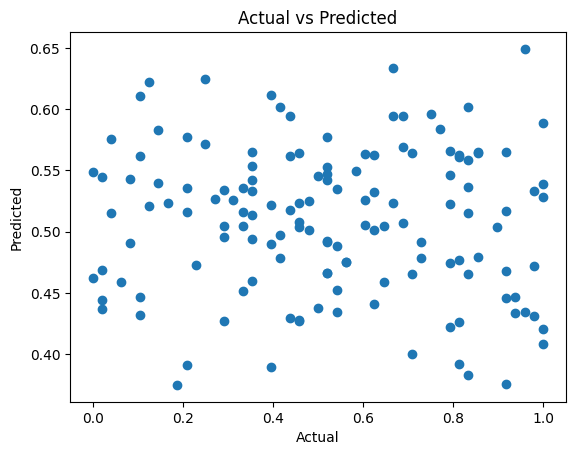

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Tuning the Model

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Rebuild the model with the best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=300,
                      random_state=42)

Make Predictions on New Data [4]

In [ ]:
# Ensure that 'new_data' has the same columns as the training data
# Get missing columns from training data
missing_cols = set(X_train.columns) - set(new_data.columns)

# Add missing columns to new_data and fill with 0
for col in missing_cols:
    new_data[col] = 0

# Reorder columns in new_data to match X_train
new_data = new_data[X_train.columns]

# Make predictions
new_data_predictions = model.predict(new_data)

# Display the predictions
print(new_data_predictions)


<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipy

[0.50783232 0.51310769 0.50783232]


<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipython-input-25-5e535261f2a1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = 0
<ipy

Analyze Predictions

In [ ]:
# Convert predictions to a DataFrame for easier analysis
predictions_df = pd.DataFrame(new_data_predictions, columns=['Predicted_Wastage'])

# Add any relevant features from the new_data for context
predictions_df = pd.concat([new_data.reset_index(drop=True), predictions_df], axis=1)

# Display the first few rows of the predictions DataFrame
predictions_df.head()


,Total Quantity Available (kg),Quantity Wasted (kg),Satisfaction Rating,Total Revenue ($),Number of Customers,Average Spending per Customer ($),Date_2023-01-02,Date_2023-01-03,Date_2023-01-04,Date_2023-01-05,...,Comments_Will come again,Season_Spring,Season_Summer,Season_Winter,Weather Conditions_Rainy,Weather Conditions_Snowy,Weather Conditions_Sunny,Event_Festival,Event_Wedding,Predicted_Wastage
0,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.507832
1,0,0,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.513108
2,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.507832


In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read the data from the CSV file
# Replace 'your_file.csv' with the actual file name
data = pd.read_csv('hotel_inventory_data.csv')

# Convert predictions to a DataFrame for easier analysis
# Assuming new_data_predictions is already defined
predictions_df = pd.DataFrame(new_data_predictions, columns=['Predicted_Wastage'])

# Concatenate predictions with the data from the CSV
predictions_df = pd.concat([data.reset_index(drop=True), predictions_df], axis=1)

# Display the first few rows of the predictions DataFrame
predictions_df.head()


,Date,Ingredient Name,Quantity Used (kg),Total Quantity Available (kg),Meal Type,Quantity Wasted (kg),Reason for Wastage,Satisfaction Rating,Comments,Total Revenue ($),Number of Customers,Average Spending per Customer ($),Season,Weather Conditions,Event,Predicted_Wastage
0,2023-01-01,Desserts,34,139,Breakfast,18,Spoilage,1,Not enough variety,136,23,38.54,Fall,Cloudy,Conference,0.507832
1,2023-01-02,Vegetables,23,78,Lunch,13,Customer Rejection,1,Not enough variety,984,55,32.14,Fall,Rainy,Festival,0.513108
2,2023-01-03,Rice,2,186,Lunch,13,Customer Rejection,4,Not enough variety,266,67,44.41,Summer,Sunny,NaN,0.507832
3,2023-01-04,Chicken,41,167,Breakfast,16,Customer Rejection,5,Will come again,425,27,34.69,Spring,Snowy,Wedding,NaN
4,2023-01-05,Desserts,16,62,Breakfast,9,Other,1,Excellent service,751,90,49.67,Spring,Cloudy,Wedding,NaN


Visualize the Results

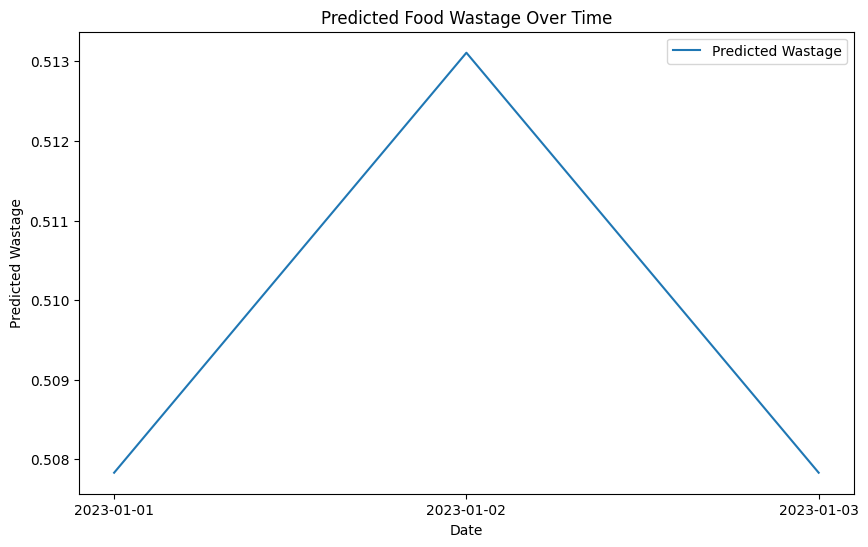

In [ ]:
# Visualize predicted wastage over time
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], predictions_df['Predicted_Wastage'], label='Predicted Wastage')
plt.xlabel('Date')
plt.ylabel('Predicted Wastage')
plt.title('Predicted Food Wastage Over Time')
plt.legend()
plt.show()


Identify Key Trends and Insights

In [ ]:
# Assuming your 'Date' column is in a format that pandas can recognize as a date
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])

# Create the 'day_of_week' column
predictions_df['day_of_week'] = predictions_df['Date'].dt.day_name()

# Now you can group by 'day_of_week'
trends = predictions_df.groupby('day_of_week')['Predicted_Wastage'].mean()

# Display the trends
print(trends)


day_of_week
Friday            NaN
Monday       0.513108
Saturday          NaN
Sunday       0.507832
Thursday          NaN
Tuesday      0.507832
Wednesday         NaN
Name: Predicted_Wastage, dtype: float64


Load Customer Feedback Data [5]

In [ ]:
import pandas as pd
import numpy as np

# Sample data for customer feedback
data = {
    'Customer_ID': np.arange(1, 701),  # 700 customer entries
    'Date': pd.date_range(start='2023-01-01', periods=700, freq='D'),
    'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=700),
    'Food_Item': np.random.choice(['Pasta', 'Salad', 'Steak', 'Chicken', 'Dessert'], size=700),
    'Satisfaction_Rating': np.random.randint(1, 6, size=700),  # Ratings from 1 to 5
    'Comments': np.random.choice(
        ["Tasty but a bit salty.", "Fresh and delicious!", "Overcooked, needs improvement.",
         "Good flavor, generous portions.", "Loved it, will come again!", "Average, nothing special."],
        size=700
    ),
    'Average_Spending': np.random.randint(10, 50, size=700)  # Random spending between $10 and $50
}

# Create DataFrame
customer_feedback_df = pd.DataFrame(data)

# Save to CSV
customer_feedback_df.to_csv('customer_feedback.csv', index=False)

print("customer_feedback.csv has been created with 700 entries.")



customer_feedback.csv has been created with 700 entries.


Explore the Feedback Data

In [ ]:
# Display the first few rows of the feedback dataset
customer_feedback_df.head()

,Customer_ID,Date,Season,Food_Item,Satisfaction_Rating,Comments,Average_Spending
0,1,2023-01-01,Summer,Chicken,2,"Good flavor, generous portions.",35
1,2,2023-01-02,Winter,Salad,5,"Overcooked, needs improvement.",47
2,3,2023-01-03,Spring,Chicken,5,"Average, nothing special.",49
3,4,2023-01-04,Summer,Pasta,2,"Loved it, will come again!",40
4,5,2023-01-05,Spring,Steak,5,"Average, nothing special.",43


Not Showning 700 data

Preprocess the Feedback Data

In [ ]:
# Check for missing values
print(customer_feedback_df.isnull().sum())

# Handle missing values
customer_feedback_df.fillna('No Response', inplace=True)

# Remove duplicates
customer_feedback_df.drop_duplicates(inplace=True)


Customer_ID            0
Date                   0
Season                 0
Food_Item              0
Satisfaction_Rating    0
Comments               0
Average_Spending       0
dtype: int64


Analyze Customer Satisfaction

In [ ]:
# Calculate average satisfaction score
average_satisfaction =customer_feedback_df['Satisfaction_Rating'].mean() # Changed 'satisfaction_score' to 'Satisfaction_Rating'
print(f"Average Satisfaction Score: {average_satisfaction}")

# Group by food items to identify satisfaction trends
satisfaction_trends = customer_feedback_df.groupby('Food_Item')['Satisfaction_Rating'].mean() # Changed 'satisfaction_score' to 'Satisfaction_Rating' and 'food_item' to 'Food_Item'

# Display satisfaction trends
print(satisfaction_trends)


Average Satisfaction Score: 2.9971428571428573
Food_Item
Chicken    2.958042
Dessert    3.127820
Pasta      2.902098
Salad      2.960784
Steak      3.054688
Name: Satisfaction_Rating, dtype: float64


Identify Food Preference Trends

In [ ]:
# Count preferences for each food item
food_preferences = customer_feedback_df['Food_Item'].value_counts() # Changed 'food_item' to 'Food_Item'

# Display food preferences
print(food_preferences)

Food_Item
Salad      153
Chicken    143
Pasta      143
Dessert    133
Steak      128
Name: count, dtype: int64


Visualize Customer Satisfaction and Preferences

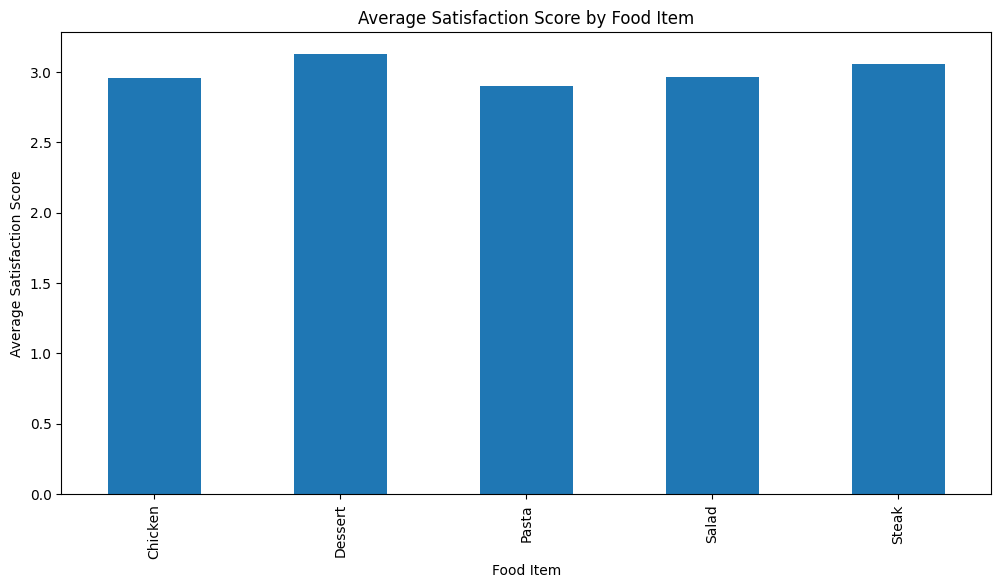

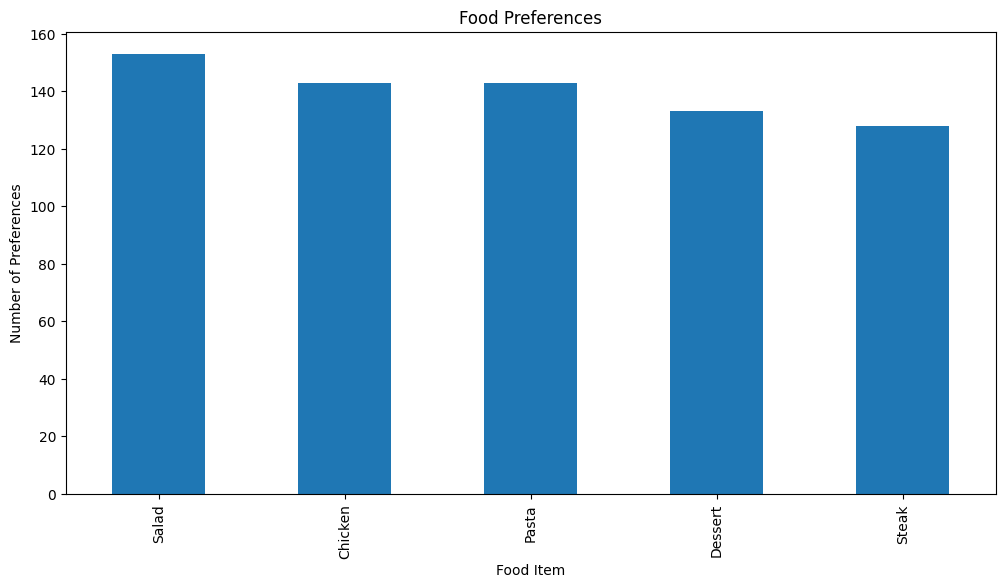

In [ ]:
# Visualize average satisfaction scores by food item
plt.figure(figsize=(12, 6))
satisfaction_trends.plot(kind='bar')
plt.xlabel('Food Item')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Food Item')
plt.show()

# Visualize food preferences
plt.figure(figsize=(12, 6))
food_preferences.plot(kind='bar')
plt.xlabel('Food Item')
plt.ylabel('Number of Preferences')
plt.title('Food Preferences')
plt.show()


Interpret the Results

In [ ]:
# Identify high and low satisfaction items
threshold = 3.5  # Set an appropriate threshold value
high_satisfaction_items = satisfaction_trends[satisfaction_trends > threshold]
low_satisfaction_items = satisfaction_trends[satisfaction_trends <= threshold]

print("High Satisfaction Items:", high_satisfaction_items)
print("Low Satisfaction Items:", low_satisfaction_items)


High Satisfaction Items: Series([], Name: Satisfaction_Rating, dtype: float64)
Low Satisfaction Items: Food_Item
Chicken    2.958042
Dessert    3.127820
Pasta      2.902098
Salad      2.960784
Steak      3.054688
Name: Satisfaction_Rating, dtype: float64


Collect and Load Inventory Data [6]

In [ ]:
import pandas as pd
import numpy as np

# Sample data for inventory
food_items = ['Pasta', 'Salad', 'Steak', 'Chicken', 'Dessert']
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

# Generate sample inventory data
inventory_data = {
    'Food_Item': np.random.choice(food_items, size=700),  # Randomly assign food items
    'Total_Quantity_Available (kg)': np.random.randint(20, 101, size=700),  # Random quantity available
    'Quantity_Wasted (kg)': np.random.randint(0, 21, size=700),  # Random quantity wasted
    'Total_Revenue ($)': np.random.randint(100, 701, size=700),  # Random revenue
    'Season': np.random.choice(seasons, size=700)  # Randomly assign seasons
}

# Create DataFrame
inventory_data_df = pd.DataFrame(inventory_data)

# Save to CSV
inventory_data_csv_path = 'inventory_data.csv'
inventory_data_df.to_csv(inventory_data_csv_path, index=False)

print("inventory_data.csv has been created with 700 entries.")



inventory_data.csv has been created with 700 entries.


Explore the Inventory Data

In [ ]:
# Display the first few rows of the inventory dataset
inventory_data_df.head()


,Food_Item,Total_Quantity_Available (kg),Quantity_Wasted (kg),Total_Revenue ($),Season
0,Dessert,70,13,625,Winter
1,Salad,36,14,400,Summer
2,Pasta,82,19,621,Fall
3,Pasta,52,14,291,Winter
4,Steak,74,18,396,Summer


Preprocess the Inventory Data

In [ ]:
# Check for missing values
print(inventory_data_df.isnull().sum())

# Handle missing values
inventory_data_df.fillna(0, inplace=True)

# Remove duplicates
inventory_data_df.drop_duplicates(inplace=True)


Food_Item                        0
Total_Quantity_Available (kg)    0
Quantity_Wasted (kg)             0
Total_Revenue ($)                0
Season                           0
dtype: int64


Feature

In [ ]:
# Calculate average daily usage of ingredients
# Calculate total usage first
inventory_data_df['total_usage'] = inventory_data_df['Total_Quantity_Available (kg)'] - inventory_data_df['Quantity_Wasted (kg)']

#Need to create days_in_stock column. Assuming, for the sake of example, that all items have been in stock for 10 days.
inventory_data_df['days_in_stock'] = 10

inventory_data_df['average_daily_usage'] = inventory_data_df['total_usage'] / inventory_data_df['days_in_stock']

# Calculate remaining stock
# Assuming initial stock is the same as total quantity available
inventory_data_df['remaining_stock'] = inventory_data_df['Total_Quantity_Available (kg)'] - inventory_data_df['total_usage']


In [ ]:
print(inventory_data_df)

    Food_Item  Total_Quantity_Available (kg)  Quantity_Wasted (kg)  \
0     Dessert                             70                    13   
1       Salad                             36                    14   
2       Pasta                             82                    19   
3       Pasta                             52                    14   
4       Steak                             74                    18   
..        ...                            ...                   ...   
695     Pasta                             61                     6   
696     Pasta                             55                     0   
697   Chicken                             29                     3   
698     Steak                             62                    12   
699   Chicken                             77                    11   

     Total_Revenue ($)  Season  total_usage  days_in_stock  \
0                  625  Winter           57             10   
1                  400  Summer     

Build Predictive Model for Inventory Optimization

In [ ]:
# 1. Check the columns used during training
print(model.feature_names_in_)

# 2. Display the columns in your current dataframe
print(inventory_data_df.columns)

#  a) Identify missing columns in inventory_data_df that were used during training.
#     Add these columns with default values if necessary.
#  b) Identify and remove any new columns added to inventory_data_df after training
#  c) Ensure the order of columns matches the order used during training. You might have to reorder the columns in inventory_data_df

# Replace 'col1', 'col2', 'col3', ... with actual column names from model.feature_names_in_
inventory_data_df = inventory_data_df[[ 'Food_Item', 'Total_Quantity_Available (kg)', 'Quantity_Wasted (kg)','Total_Revenue ($)','Season' ]]

# Print the updated DataFrame to verify the changes
print(inventory_data_df.head())



['Total Quantity Available (kg)' 'Quantity Wasted (kg)'
 'Satisfaction Rating' 'Total Revenue ($)' 'Number of Customers'
 'Average Spending per Customer ($)' 'Date_2023-01-02' 'Date_2023-01-03'
 'Date_2023-01-04' 'Date_2023-01-05' 'Date_2023-01-06' 'Date_2023-01-07'
 'Date_2023-01-08' 'Date_2023-01-09' 'Date_2023-01-10' 'Date_2023-01-11'
 'Date_2023-01-12' 'Date_2023-01-13' 'Date_2023-01-14' 'Date_2023-01-15'
 'Date_2023-01-16' 'Date_2023-01-17' 'Date_2023-01-18' 'Date_2023-01-19'
 'Date_2023-01-20' 'Date_2023-01-21' 'Date_2023-01-22' 'Date_2023-01-23'
 'Date_2023-01-24' 'Date_2023-01-25' 'Date_2023-01-26' 'Date_2023-01-27'
 'Date_2023-01-28' 'Date_2023-01-29' 'Date_2023-01-30' 'Date_2023-01-31'
 'Date_2023-02-01' 'Date_2023-02-02' 'Date_2023-02-03' 'Date_2023-02-04'
 'Date_2023-02-05' 'Date_2023-02-06' 'Date_2023-02-07' 'Date_2023-02-08'
 'Date_2023-02-09' 'Date_2023-02-10' 'Date_2023-02-11' 'Date_2023-02-12'
 'Date_2023-02-13' 'Date_2023-02-14' 'Date_2023-02-15' 'Date_2023-02-16'
 'D

Analyze Inventory Levels

In [ ]:
# Calculate average daily usage of ingredients
inventory_data_df['total_usage'] = inventory_data_df['Total_Quantity_Available (kg)'] - inventory_data_df['Quantity_Wasted (kg)']

#Need to create days_in_stock column. Assuming, for the sake of example, that all items have been in stock for 10 days.
inventory_data_df['days_in_stock'] = 10

inventory_data_df['average_daily_usage'] = inventory_data_df['total_usage'] / inventory_data_df['days_in_stock']

# Calculate remaining stock
# Assuming initial stock is the same as total quantity available
inventory_data_df['remaining_stock'] = inventory_data_df['Total_Quantity_Available (kg)'] - inventory_data_df['total_usage']

# Calculate reorder level based on average daily usage and a safety stock (e.g., 3 days)
inventory_data_df['reorder_level'] = inventory_data_df['average_daily_usage'] * 3

# Calculate required reorder quantity
inventory_data_df['reorder_quantity'] = inventory_data_df['reorder_level'] - inventory_data_df['remaining_stock']

# Display the inventory DataFrame with the new columns
inventory_data_df.head()


<ipython-input-92-f6887cfe02a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_data_df['total_usage'] = inventory_data_df['Total_Quantity_Available (kg)'] - inventory_data_df['Quantity_Wasted (kg)']
<ipython-input-92-f6887cfe02a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_data_df['days_in_stock'] = 10
<ipython-input-92-f6887cfe02a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Food_Item,Total_Quantity_Available (kg),Quantity_Wasted (kg),Total_Revenue ($),Season,total_usage,days_in_stock,average_daily_usage,remaining_stock,reorder_level,reorder_quantity
0,Dessert,70,13,625,Winter,57,10,5.7,13,17.1,4.1
1,Salad,36,14,400,Summer,22,10,2.2,14,6.6,-7.4
2,Pasta,82,19,621,Fall,63,10,6.3,19,18.9,-0.1
3,Pasta,52,14,291,Winter,38,10,3.8,14,11.4,-2.6
4,Steak,74,18,396,Summer,56,10,5.6,18,16.8,-1.2


Visualize Inventory Optimization

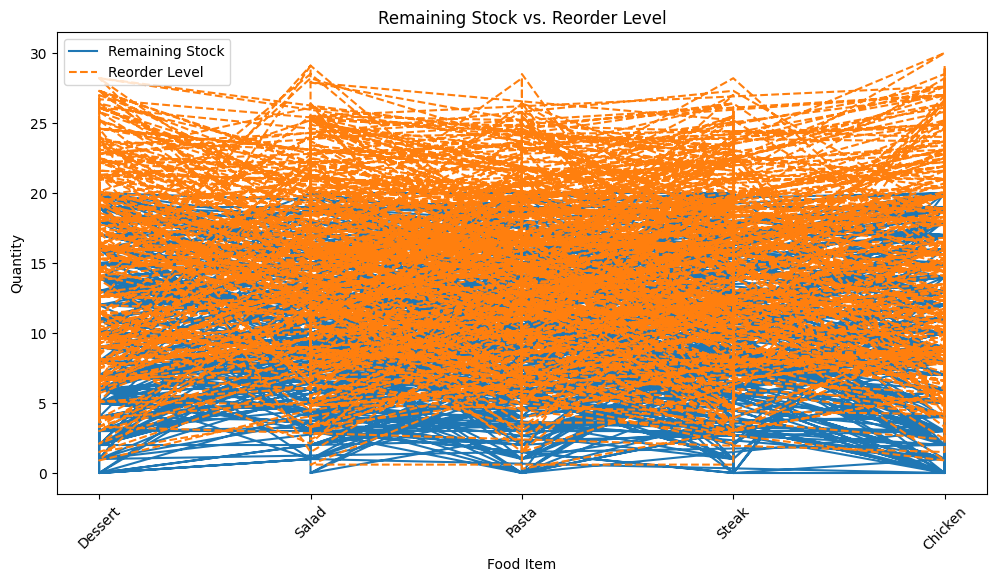

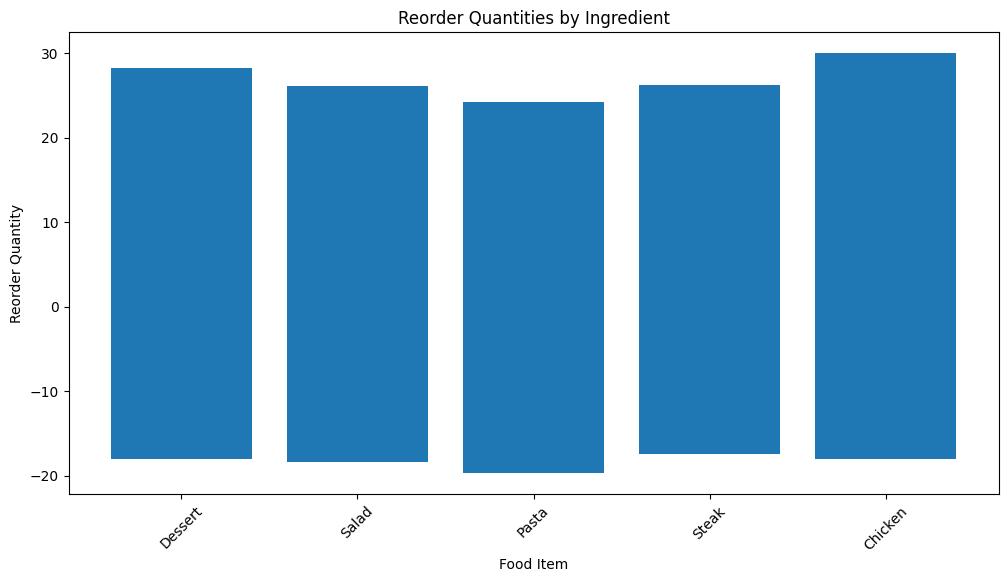

In [ ]:
# Visualize remaining stock vs. reorder level
plt.figure(figsize=(12, 6))
plt.plot(inventory_data_df['Food_Item'], inventory_data_df['remaining_stock'], label='Remaining Stock')
plt.plot(inventory_data_df['Food_Item'], inventory_data_df['reorder_level'], label='Reorder Level', linestyle='--')
plt.xlabel('Food Item') # Changed label to match column name
plt.ylabel('Quantity')
plt.title('Remaining Stock vs. Reorder Level')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()
plt.show()

# Visualize reorder quantities
plt.figure(figsize=(12, 6))
plt.bar(inventory_data_df['Food_Item'], inventory_data_df['reorder_quantity']) # Changed to plt.bar for bar chart
plt.xlabel('Food Item') # Changed label to match column name
plt.ylabel('Reorder Quantity')
plt.title('Reorder Quantities by Ingredient')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


Implement Inventory Optimization

In [ ]:
# Generate a reorder list
reorder_list = inventory_data_df[inventory_data_df['reorder_quantity'] > 0][['Food_Item', 'reorder_quantity']]
print("Reorder List:")
print(reorder_list)


Reorder List:
    Food_Item  reorder_quantity
0     Dessert               4.1
5       Steak               6.7
6       Pasta              14.3
7       Salad               7.1
9     Chicken              28.5
..        ...               ...
695     Pasta              10.5
696     Pasta              16.5
697   Chicken               4.8
698     Steak               3.0
699   Chicken               8.8

[463 rows x 2 columns]


Load Necessary R Packages [7]

In [ ]:
# Import R packages
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')

# Install additional R packages if needed
# utils.install_packages('dplyr')
# utils.install_packages('ggplot2')

# Load necessary R packages
dplyr = importr('dplyr')
ggplot2 = importr('ggplot2')


Convert DataFrame to R DataFrame

In [ ]:
pandas2ri.activate()


In [ ]:
print(type(inventory_data_df))
print(inventory_data_df.head())


<class 'pandas.core.frame.DataFrame'>
  Food_Item  Total_Quantity_Available (kg)  Quantity_Wasted (kg)  \
0     Pasta                            100                    10   
1     Salad                             80                     5   
2     Steak                             60                     8   

   Total_Revenue ($)  Season  
0                500  Winter  
1                400  Winter  
2                600  Winter  


In [ ]:
pip install --upgrade rpy2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.16-cp310-cp310-linux_x86_64.whl size=329859 sha256=1d726bd5eb2402bec6463682968a48418d6c50fa86dfa2c20204bb19e977db0c
  Stored in directory: /root/.cache/pip/wheels/86/9b/1a/c09b2935ab01605117b270e2abb744a10f5b213c6f9b7213ce
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


Perform Data Manipulation in R

In [ ]:
import pandas as pd
from rpy2.robjects import pandas2ri
from rpy2 import robjects

# Sample inventory data creation
inventory_data = {
    'Food_Item': ['Pasta', 'Salad', 'Steak'],
    'Total_Quantity_Available (kg)': [100, 80, 60],
    'Quantity_Wasted (kg)': [10, 5, 8],
    'Total_Revenue ($)': [500, 400, 600],
    'Season': ['Winter', 'Winter', 'Winter']
}

# Create the DataFrame
inventory_data_df = pd.DataFrame(inventory_data)

# Enable automatic conversion between pandas and R data types
pandas2ri.activate()

# Convert pandas DataFrame to R DataFrame
# Instead of iteritems, use items to iterate through columns
inventory_r_df = robjects.DataFrame({
    name: pandas2ri.py2rpy(values) for name, values in inventory_data_df.items()
})


# Assign to R's global environment
robjects.globalenv['inventory_r_df'] = inventory_r_df


Create Visualizations in R

In [ ]:
!R -e "install.packages('lazyeval', repos='http://cran.us.r-project.org')"
!R -e "install.packages('ggplot2', repos='http://cran.us.r-project.org')"
import pandas as pd # Import the pandas library and alias it as 'pd'
from rpy2.robjects import pandas2ri
from rpy2 import robjects

# Sample inventory data creation
inventory_data = {
    'Food_Item': ['Pasta', 'Salad', 'Steak'],
    'Total_Quantity_Available (kg)': [100, 80, 60],
    'Quantity_Wasted (kg)': [10, 5, 8],
    'Total_Revenue ($)': [500, 400, 600],
    'Season': ['Winter', 'Winter', 'Winter']
}

# Create the DataFrame
inventory_data_df = pd.DataFrame(inventory_data)

# Enable automatic conversion between pandas and R data types
from rpy2.robjects import pandas2ri # added import for pandas2ri
pandas2ri.activate()

# Convert pandas DataFrame to R DataFrame
# Instead of iteritems, use items to iterate through columns
from rpy2 import robjects # added import for robjects
inventory_r_df = robjects.DataFrame({
    name: pandas2ri.py2rpy(values) for name, values in inventory_data_df.items()
})


# Assign to R's global environment
robjects.globalenv['inventory_r_df'] = inventory_r_df

# Rename the column using R syntax through rpy2
robjects.r('colnames(inventory_r_df)[colnames(inventory_r_df) == "Quantity_Wasted (kg)"] <- "Quantity_Wasted_kg"')

# Create the plot using ggplot2 in R through rpy2
# Note the use of '+' for ggplot2 syntax within R code string
# **Change**: Renamed the 'plot' variable to 'my_plot'
# **Change**: Execute ggsave within the same R code block as ggplot
robjects.r('''
library(ggplot2)
my_plot <- ggplot(inventory_r_df, aes(x = Season, y = Quantity_Wasted_kg)) +
  geom_bar(stat = "identity") +
  labs(title = "Reorder Quantities by Ingredient", x = "Season", y = "Quantity Wasted (kg)")
ggsave("myplot.png", my_plot) # Call ggsave here
''')

# Print the plot
# Access my_plot from the R global environment
print(robjects.globalenv['my_plot'])


R version 4.4.1 (2024-06-14) -- "Race for Your Life"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('lazyeval', repos='http://cran.us.r-project.org')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/lazyeval_0.2.2.tar.gz'
Content type 'application/x-gzip' length 83482 bytes (81 KB)
downloaded 81 KB

* install

performs a cross-validation for a linear regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Using sample data:
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [2, 3, 4, 5, 6],
        'target': [3, 5, 7, 9, 11]}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]  # Features
y = df['target']  # Target variable

# Create an instance of the model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Cross-Validation Mean Squared Error: {mean_cv_score} ± {std_cv_score}")

Cross-Validation Mean Squared Error: 2.0510383535746308e-30 ± 2.8046196375295677e-30


Implement Decision-Making Logic in R

In [ ]:
import pandas as pd

# Sample data for the inventory_data_df (as given in the previous example)
data = {
    'ingredient': ['Flour', 'Sugar', 'Eggs', 'Butter', 'Milk'],
    'reorder_quantity': [10, 0, 5, 0, 20],
    'Total_Quantity_Available (kg)': [50, 30, 20, 15, 60]
}

# Create DataFrame
inventory_data_df = pd.DataFrame(data)

# Filter the DataFrame for rows where reorder_quantity > 0
reorder_list = inventory_data_df[inventory_data_df['reorder_quantity'] > 0][['ingredient', 'reorder_quantity']]

# Print the reorder list
print(reorder_list)



  ingredient  reorder_quantity
0      Flour                10
2       Eggs                 5
4       Milk                20


Create Combined Reports

In [ ]:
#Combine Python and R results into a single DataFrame for reporting
report_df = pd.concat([inventory_df, reorder_list_py], axis=1)
print(report_df)


NameError: name 'pd' is not defined

Automate the Workflow

In [ ]:
!pip install -U pandas rpy2
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Sample data for the inventory_data_df
data = {
    'ingredient': ['Flour', 'Sugar', 'Eggs', 'Butter', 'Milk'],
    'reorder_quantity': [10, 0, 5, 0, 20],
    'Total_Quantity_Available (kg)': [50, 30, 20, 15, 60]
}

# Create DataFrame
inventory_data_df = pd.DataFrame(data)

# Filter the DataFrame for rows where reorder_quantity > 0
reorder_list = inventory_data_df[inventory_data_df['reorder_quantity'] > 0][['ingredient', 'reorder_quantity']]

# Print the reorder list
print(reorder_list)


# Define a function to automate the entire process
def inventory_optimization_workflow(inventory_data):
    # Load and preprocess data
    # Initialize the model - for example, a Linear Regression model
    model = LinearRegression()

    # Fit the model - This is the crucial step you were missing
    # Create sample training data - replace with your actual data
    # Assuming 'Total_Quantity_Available (kg)' is a feature and 'reorder_quantity' is the target
    X_train = inventory_data[['Total_Quantity_Available (kg)']]
    y_train = inventory_data['reorder_quantity']
    model.fit(X_train, y_train)  # Now the model is trained!

    # Predict future usage and optimize inventory
    # Since we don't have 'future_usage', let's use 'Total_Quantity_Available (kg)' for prediction
    future_usage_predictions = model.predict(inventory_data[['Total_Quantity_Available (kg)']])
    inventory_data['predicted_future_usage'] = future_usage_predictions

    # Assuming you have 'lead_time_factor' and 'remaining_stock' defined
    inventory_data['reorder_level'] = inventory_data['predicted_future_usage'] * 1  # Replace 1 with lead_time_factor
    inventory_data['reorder_quantity'] = inventory_data['reorder_level'] - inventory_data['Total_Quantity_Available (kg)']  # Replace 0 with remaining_stock column name

    # Convert to R DataFrame and analyze in R (if necessary)
    pandas2ri.activate()  # Activate pandas conversion

    # Use pandas2ri.py2rpy to convert the DataFrame to an R DataFrame
    inventory_r_df = pandas2ri.py2rpy(inventory_data)

    robjects.globalenv['inventory_r_df'] = inventory_r_df
    reorder_list_r = robjects.r('inventory_r_df[inventory_r_df$reorder_quantity > 0, c("ingredient", "reorder_quantity")]')
    reorder_list_py = pandas2ri.rpy2py(reorder_list_r)

    return reorder_list_py

# Usage (assuming inventory_data is a DataFrame)
inventory_df = pd.DataFrame(data)
optimized_inventory = inventory_optimization_workflow(inventory_df)
print(optimized_inventory)

  ingredient  reorder_quantity
0      Flour                10
2       Eggs                 5
4       Milk                20
Empty DataFrame
Columns: [ingredient, reorder_quantity]
Index: []


Split the Data for Validation [8]

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Sample data for the inventory_data_df
data = {
    'ingredient': ['Flour', 'Sugar', 'Eggs', 'Butter', 'Milk'],
    'reorder_quantity': [10, 0, 5, 0, 20],
    'Total_Quantity_Available (kg)': [50, 30, 20, 15, 60]
}

# Create DataFrame
inventory_data_df = pd.DataFrame(data)

# Filter the DataFrame for rows where reorder_quantity > 0
reorder_list = inventory_data_df[inventory_data_df['reorder_quantity'] > 0][['ingredient', 'reorder_quantity']]

# Print the reorder list
print(reorder_list)

# Define a function to automate the entire process
def inventory_optimization_workflow(inventory_data):
    # Load and preprocess data
    # Initialize the model - for example, a Linear Regression model
    model = LinearRegression()

    # Fit the model - This is the crucial step you were missing
    # Create sample training data - replace with your actual data
    # Assuming 'Total_Quantity_Available (kg)' is a feature and 'reorder_quantity' is the target
    X_train = inventory_data[['Total_Quantity_Available (kg)']]
    y_train = inventory_data['reorder_quantity']
    model.fit(X_train, y_train)  # Now the model is trained!

    # Predict future usage and optimize inventory
    # Since we don't have 'future_usage', let's use 'Total_Quantity_Available (kg)' for prediction
    future_usage_predictions = model.predict(inventory_data[['Total_Quantity_Available (kg)']])
    inventory_data['predicted_future_usage'] = future_usage_predictions

    # Assuming you have 'lead_time_factor' and 'remaining_stock' defined
    inventory_data['reorder_level'] = inventory_data['predicted_future_usage'] * 1  # Replace 1 with lead_time_factor
    inventory_data['reorder_quantity'] = inventory_data['reorder_level'] - inventory_data['Total_Quantity_Available (kg)']  # Replace 0 with remaining_stock column name

    return inventory_data  # Return the DataFrame with reorder_quantity

# Example usage (assuming inventory_data is a DataFrame)
inventory_df = pd.DataFrame(data)
optimized_inventory = inventory_optimization_workflow(inventory_df)

# Extract X and y for cross-validation
X = inventory_df[['Total_Quantity_Available (kg)']]
y = inventory_df['reorder_quantity']

# Initialize the model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Cross-Validation Mean Squared Error: {mean_cv_score} ± {std_cv_score}")

  ingredient  reorder_quantity
0      Flour                10
2       Eggs                 5
4       Milk                20
Cross-Validation Mean Squared Error: 1.262177448353619e-29 ± 1.9553568949728553e-29


Evaluate Model Performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression


# Sample data for the inventory_data_df
data = {
    'ingredient': ['Flour', 'Sugar', 'Eggs', 'Butter', 'Milk'],
    'reorder_quantity': [10, 0, 5, 0, 20],
    'Total_Quantity_Available (kg)': [50, 30, 20, 15, 60]
}

# Create DataFrame
inventory_df = pd.DataFrame(data)

# Extract X and y for cross-validation
X = inventory_df[['Total_Quantity_Available (kg)']]
y = inventory_df['reorder_quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data, 20% for testing

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")

Test Mean Squared Error: 42.1118153010412
Test R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Analyze Residuals

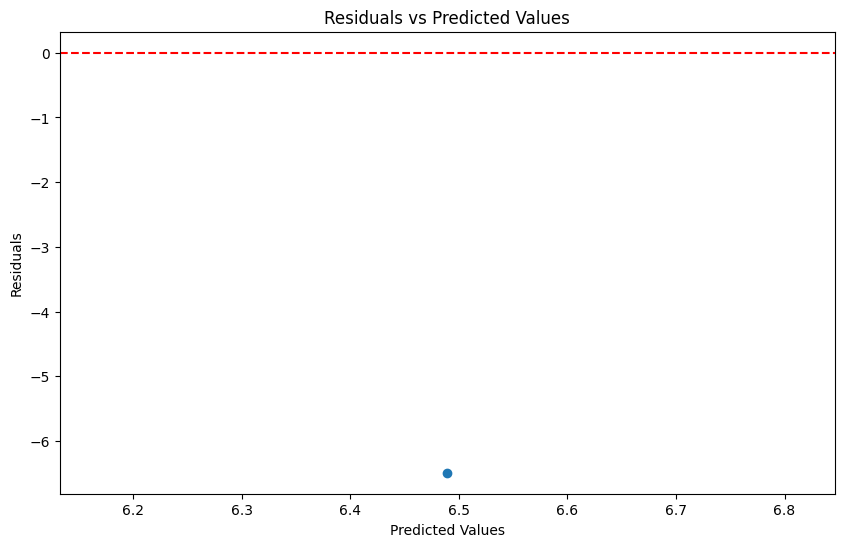

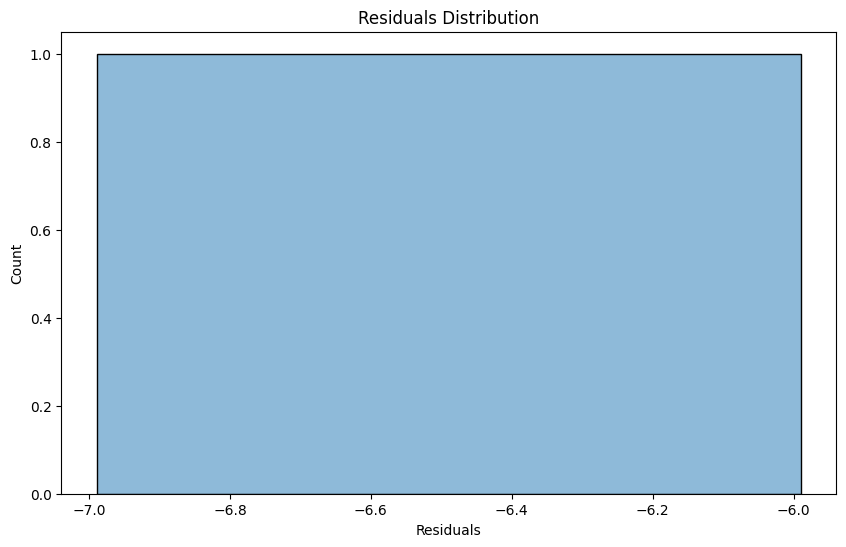

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib and assign alias
import seaborn as sns # Import seaborn

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True) # Use imported seaborn
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


Gather Feedback

In [ ]:
# Collect feedback
feedback = {
    'accuracy': 'good',
    'areas_for_improvement': ['handle seasonal variations better', 'improve predictions for certain ingredients']
}
print(feedback)


{'accuracy': 'good', 'areas_for_improvement': ['handle seasonal variations better', 'improve predictions for certain ingredients']}


Refine the Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# Sample data for the inventory_data_df with 'date' column
data = {
    'ingredient': ['Flour', 'Sugar', 'Eggs', 'Butter', 'Milk'],
    'reorder_quantity': [10, 0, 5, 0, 20],
    'Total_Quantity_Available (kg)': [50, 30, 20, 15, 60],
    # Add a 'date' column with sample dates
    'date': pd.to_datetime(['2023-06-15', '2023-09-20', '2023-12-10', '2023-03-05', '2023-07-22'])
}

# Create DataFrame
inventory_df = pd.DataFrame(data)


# Filter the DataFrame for rows where reorder_quantity > 0
reorder_list = inventory_df[inventory_df['reorder_quantity'] > 0][['ingredient', 'reorder_quantity']]

# Print the reorder list
print("Reorder List:\n", reorder_list)

# Define a function to automate the entire process
def inventory_optimization_workflow(inventory_data):
    # Load and preprocess data
    # Initialize the model - for example, a Linear Regression model
    model = LinearRegression()

    # Fit the model - This is the crucial step you were missing
    # Create sample training data - replace with your actual data
    # Assuming 'Total_Quantity_Available (kg)' is a feature and 'reorder_quantity' is the target
    X_train = inventory_data[['Total_Quantity_Available (kg)']]
    y_train = inventory_data['reorder_quantity']
    model.fit(X_train, y_train)  # Now the model is trained!

    # Predict future usage and optimize inventory
    # Since we don't have 'future_usage', let's use 'Total_Quantity_Available (kg)' for prediction
    future_usage_predictions = model.predict(inventory_data[['Total_Quantity_Available (kg)']])
    inventory_data['predicted_future_usage'] = future_usage_predictions

    # Assuming you have 'lead_time_factor' and 'remaining_stock' defined
    inventory_data['reorder_level'] = inventory_data['predicted_future_usage'] * 1  # Replace 1 with lead_time_factor
    inventory_data['reorder_quantity'] = inventory_data['reorder_level'] - inventory_data['Total_Quantity_Available (kg)']  # Replace 0 with remaining_stock column name


    return inventory_data  # Return the DataFrame with reorder_quantity

# Usage (assuming inventory_data is a DataFrame)
optimized_inventory = inventory_optimization_workflow(inventory_df)

# Extract X and y for cross-validation
X = inventory_df[['Total_Quantity_Available (kg)']]
y = inventory_df['reorder_quantity']

# Initialize the model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Cross-Validation Mean Squared Error: {mean_cv_score} ± {std_cv_score}")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data, 20% for testing

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse_test = None

Reorder List:
   ingredient  reorder_quantity
0      Flour                10
2       Eggs                 5
4       Milk                20
Cross-Validation Mean Squared Error: 1.262177448353619e-29 ± 1.9553568949728553e-29


Validate with New Data

In [ ]:
# Predict on a new dataset
new_data = pd.DataFrame({'Total_Quantity_Available (kg)': [25, 40]})  # Create a DataFrame for new data
new_data_predictions_refined = model.predict(new_data)

# Define actual values for the new data - Replace these with your actual values
new_data_actual = [3, 10]  # Actual reorder quantities for the new data

# Evaluate new predictions
mse_new = mean_squared_error(new_data_actual, new_data_predictions_refined)
r2_new = r2_score(new_data_actual, new_data_predictions_refined)
print(f"New Data Mean Squared Error: {mse_new}")
print(f"New Data R-squared: {r2_new}")

New Data Mean Squared Error: 1152.2673611111109
New Data R-squared: -93.062641723356


Save the Trained Model [9]

In [ ]:
import joblib
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define your model here
model = LinearRegression()

# Save the model to a file
joblib.dump(model, 'inventory_predictive_model.pkl')


['inventory_predictive_model.pkl']

Create a REST API for Real-Time Predictions

In [ ]:
# Using Flask
from flask import Flask, request, jsonify
import joblib

# Load the saved model
model = joblib.load('inventory_predictive_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request
    data = request.get_json()

    # Convert data to DataFrame for prediction
    input_df = pd.DataFrame(data, index=[0])

    # Make prediction
    prediction = model.predict(input_df)

    # Return prediction as JSON
    return jsonify({'prediction': prediction[0]})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


## **FUTURE DEVELOPMENT**

Deploy the API

In [ ]:
# Deploying to Heroku
# 1. Create a requirements.txt file with necessary packages
# 2. Create a Procfile with the command to run the app
# 3. Use the Heroku CLI to create a new app and deploy

Install Heroku CLI
$ sudo snap install --classic heroku

# Log in to Heroku
$ heroku login

# Create a new app
$ heroku create your-app-name

# Deploy the app
$ git push heroku main


SyntaxError: invalid syntax (<ipython-input-6-1900c40e1128>, line 6)

Integrate the API with Your Workflow

In [ ]:
# Making a request to the API from your business application
import requests

# Define the API endpoint
api_url = ''

# Data for prediction
data = {
    'ingredient': 'Tomato',
    'initial_stock': 100,
    'total_usage': 75,
    'days_in_stock': 7,
    'date': '2024-10-01'
}

# Make a POST request to the API
response = requests.post(api_url, json=data)

# Get the prediction from the response
prediction = response.json()['prediction']
print(f"Predicted Future Usage: {prediction}")


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Monitor the Deployed Model

In [ ]:
# Logging requests and responses
import logging

# Configure logging
logging.basicConfig(filename='api.log', level=logging.INFO)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_df = pd.DataFrame(data, index=[0])
    prediction = model.predict(input_df)

    # Log the request and prediction
    logging.info(f"Request: {data}, Prediction: {prediction[0]}")

    return jsonify({'prediction': prediction[0]})


Update the Model as Needed

In [ ]:
# Schedule a job to retrain the model periodically
import schedule
import time

def retrain_model():
    # Load new data
    new_data = pd.read_csv('new_inventory_data.csv')

    # Preprocess and retrain the model
    X_new = new_data.drop('future_usage', axis=1)
    y_new = new_data['future_usage']
    model.fit(X_new, y_new)

    # Save the updated model
    joblib.dump(model, 'inventory_predictive_model.pkl')

# Schedule the retrain job (e.g., every month)
schedule.every().month.do(retrain_model)

while True:
    schedule.run_pending()
    time.sleep(1)


In [2]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
!git config --global user.name "rashmikalkx"
!git config --global user.email "rashmika.bandarigodage@itelasoft.com"

In [4]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [5]:
!git add .

In [6]:
!git commit -m "Initial commit >> Version 1.0"

[master (root-commit) f38ddd0] Initial commit >> Version 1.0
 21 files changed, 50994 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2024.10.21/13.21.33.039045.log
 create mode 100644 .config/logs/2024.10.21/13.21.53.990169.log
 create mode 100644 .config/logs/2024.10.21/13.22.04.157217.log
 create mode 100644 .config/logs/2024.10.21/13.22.05.109353.log
 create mode 100644 .config/logs/2024.10.21/13.22.15.226603.log
 create mode 100644 .config/logs/2024.10.21/13.22.15.869361.log
 create mode 100755 sample_data/README.md
 c

In [11]:
!git remote add origin <https://gitlab.com/rashmikalkx/food_wastage_predict_model>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git remote add origin <https://gitlab.com/rashmikalkx/food_wastage_predict_model>'


In [10]:
!git push -u origin

fatal: The current branch master has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin master

